In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
from matplotlib import colors as mcolors
from ipyleaflet import Map, basemaps, Heatmap, basemap_to_tiles
from ipywidgets import Layout
from sklearn.preprocessing import Imputer, StandardScaler
from ipyleaflet import Map, basemaps, Heatmap, basemap_to_tiles
from ipywidgets import Layout

%matplotlib inline

## Business Understanding

When it comes to the question - I'm going to visit Berlin and I would like to use AirBnB service to book my accommodation - what is the best time to visit the city and what are the best areas to book an accommodation listed on AirBnB? To answer this question we can use Data Science methods.

## Data Understanding

Let's check calendar_summary.csv file - Summary calendar Data for listings in Berlin

In [4]:
df_cal = pd.read_csv('./data/Berlin/calendar_summary.csv')
df_cal.head()

,listing_id,date,available,price
0,2015,2019-09-10,f,NaN
1,2015,2019-09-09,f,NaN
2,2015,2019-09-08,f,NaN
3,2015,2019-09-07,f,NaN
4,2015,2019-09-06,f,NaN


In [5]:
df_cal.shape

(8231480, 4)

In [7]:
df_cal.isnull().sum()

listing_id          0
date                0
available           0
price         6430639
dtype: int64

Let's check listings_summary.csv file - Summary information and metrics for listings in Berlin

In [10]:
df_lis = pd.read_csv('./data/Berlin/listings_summary.csv')
df_lis.shape

(22552, 96)

In [11]:
df_lis.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,t,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,https://www.airbnb.com/rooms/3309,20181107122246,2018-11-07,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,https://www.airbnb.com/rooms/7071,20181107122246,2018-11-07,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,t,NaN,NaN,f,f,moderate,f,f,1,1.75


In [12]:
df_lis.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [22]:
df_lis.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                       float64
medium_url                          float64
picture_url                          object
xl_picture_url                      float64
host_id                               int64
host_url                             object
host_name                            object
host_since                      

In [13]:
df_lis.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,2.255200e+04,2.255200e+04,0.0,0.0,0.0,2.255200e+04,0.0,22526.000000,22526.000000,22552.000000,...,18163.000000,18138.000000,18141.000000,18120.000000,18134.000000,18121.000000,18117.000000,0.0,22552.000000,18638.000000
mean,1.571560e+07,2.018111e+13,NaN,NaN,NaN,5.403355e+07,NaN,2.330685,2.330685,52.509824,...,94.413863,9.663965,9.324955,9.713521,9.730672,9.505491,9.411106,NaN,1.918233,1.135525
std,8.552069e+06,0.000000e+00,NaN,NaN,NaN,5.816290e+07,NaN,19.947823,19.947823,0.030825,...,7.639644,0.740039,1.031996,0.704620,0.686614,0.762161,0.841492,NaN,3.667257,1.507082
min,2.015000e+03,2.018111e+13,NaN,NaN,NaN,2.217000e+03,NaN,0.000000,0.000000,52.345803,...,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.010000
25%,8.065954e+06,2.018111e+13,NaN,NaN,NaN,9.240002e+06,NaN,1.000000,1.000000,52.489065,...,92.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.180000
50%,1.686638e+07,2.018111e+13,NaN,NaN,NaN,3.126711e+07,NaN,1.000000,1.000000,52.509079,...,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,0.540000
75%,2.258393e+07,2.018111e+13,NaN,NaN,NaN,8.067518e+07,NaN,2.000000,2.000000,52.532669,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.500000
max,2.986735e+07,2.018111e+13,NaN,NaN,NaN,2.245081e+08,NaN,1676.000000,1676.000000,52.651670,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,45.000000,36.670000


In [16]:
df_lis.isnull().sum().sort_values()

id                                      0
neighbourhood_group_cleansed            0
smart_location                          0
country_code                            0
calculated_host_listings_count          0
latitude                                0
longitude                               0
is_location_exact                       0
property_type                           0
room_type                               0
accommodates                            0
bed_type                                0
amenities                               0
price                                   0
guests_included                         0
extra_people                            0
minimum_nights                          0
maximum_nights                          0
require_guest_phone_verification        0
require_guest_profile_picture           0
cancellation_policy                     0
is_business_travel_ready                0
instant_bookable                        0
requires_license                  

In [18]:
df_rev = pd.read_csv('./data/Berlin/reviews_summary.csv')
df_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...
2,2015,71605267,2016-04-26,30048708,Victor,Un appartement tres bien situé dans un quartie...
3,2015,73819566,2016-05-10,63697857,Judy,"It is really nice area, food, park, transport ..."
4,2015,74293504,2016-05-14,10414887,Romina,"Buena ubicación, el departamento no está orden..."


In [19]:
df_rev.shape

(401963, 6)

In [21]:
df_rev.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

## Data Preparation and cleaning

In [309]:
def remove_unnecessary_sign(df, column, sign):
    df[column] = df[column].astype(str)
    df[column] = [x.strip(sign).replace(',', '') for x in df[column]]
    df[column] = df[column].astype(float)
    return df

In [310]:
def replace_bool_symbols(df, column):
    df[column].replace(['t', 'f'], [1, 0])
    return df

In [311]:
df_cal_clean = remove_unnecessary_sign(df_cal, 'price', '$')
df_cal_clean.head()

,listing_id,date,available,price
0,2015,2019-09-10,f,NaN
1,2015,2019-09-09,f,NaN
2,2015,2019-09-08,f,NaN
3,2015,2019-09-07,f,NaN
4,2015,2019-09-06,f,NaN


In [312]:
df_lis = remove_unnecessary_sign(df_lis, 'price', '$')
df_lis = remove_unnecessary_sign(df_lis, 'extra_people', '$')
df_lis = remove_unnecessary_sign(df_lis, 'host_response_rate', '%')
df_lis = remove_unnecessary_sign(df_lis, 'host_acceptance_rate', '%')
df_lis = remove_unnecessary_sign(df_lis, 'weekly_price', '$')
df_lis = remove_unnecessary_sign(df_lis, 'monthly_price', '$')
df_lis = remove_unnecessary_sign(df_lis, 'security_deposit', '$')
df_lis = remove_unnecessary_sign(df_lis, 'cleaning_fee', '$')

In [313]:
df_lis.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,2.255200e+04,2.255200e+04,0.0,0.0,0.0,2.255200e+04,9657.000000,0.0,22526.000000,22526.000000,...,18163.000000,18138.000000,18141.000000,18120.000000,18134.000000,18121.000000,18117.000000,0.0,22552.000000,18638.000000
mean,1.571560e+07,2.018111e+13,NaN,NaN,NaN,5.403355e+07,91.898519,NaN,2.330685,2.330685,...,94.413863,9.663965,9.324955,9.713521,9.730672,9.505491,9.411106,NaN,1.918233,1.135525
std,8.552069e+06,0.000000e+00,NaN,NaN,NaN,5.816290e+07,19.376108,NaN,19.947823,19.947823,...,7.639644,0.740039,1.031996,0.704620,0.686614,0.762161,0.841492,NaN,3.667257,1.507082
min,2.015000e+03,2.018111e+13,NaN,NaN,NaN,2.217000e+03,0.000000,NaN,0.000000,0.000000,...,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.010000
25%,8.065954e+06,2.018111e+13,NaN,NaN,NaN,9.240002e+06,95.000000,NaN,1.000000,1.000000,...,92.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.180000
50%,1.686638e+07,2.018111e+13,NaN,NaN,NaN,3.126711e+07,100.000000,NaN,1.000000,1.000000,...,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,0.540000
75%,2.258393e+07,2.018111e+13,NaN,NaN,NaN,8.067518e+07,100.000000,NaN,2.000000,2.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.500000
max,2.986735e+07,2.018111e+13,NaN,NaN,NaN,2.245081e+08,100.000000,NaN,1676.000000,1676.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,45.000000,36.670000


In [314]:
missing_per_column_percent = ((df_lis.isnull().sum()/len(df_lis))*100)
missing_per_column_percent.sort_values(ascending=False)

xl_picture_url                      100.000000
jurisdiction_names                  100.000000
thumbnail_url                       100.000000
medium_url                          100.000000
host_acceptance_rate                100.000000
square_feet                          98.022348
license                              92.736786
monthly_price                        88.209471
weekly_price                         83.677723
notes                                68.007272
host_response_rate                   57.178964
host_response_time                   57.174530
interaction                          53.857751
access                               51.946612
host_about                           50.385775
house_rules                          49.232884
neighborhood_overview                48.829372
transit                              42.195814
security_deposit                     41.508514
space                                37.832565
cleaning_fee                         31.686768
host_neighbou

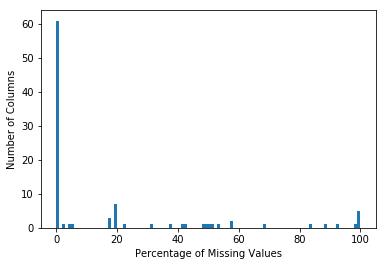

In [315]:
plt.hist(missing_per_column_percent, bins=100)
plt.ylabel('Number of Columns')
plt.xlabel('Percentage of Missing Values')
plt.show()

In [316]:
colums_to_drop = missing_per_column_percent[missing_per_column_percent > 20]
colums_to_drop

space                     37.832565
neighborhood_overview     48.829372
notes                     68.007272
transit                   42.195814
access                    51.946612
interaction               53.857751
house_rules               49.232884
thumbnail_url            100.000000
medium_url               100.000000
xl_picture_url           100.000000
host_about                50.385775
host_response_time        57.174530
host_response_rate        57.178964
host_acceptance_rate     100.000000
host_neighbourhood        22.587797
square_feet               98.022348
weekly_price              83.677723
monthly_price             88.209471
security_deposit          41.508514
cleaning_fee              31.686768
license                   92.736786
jurisdiction_names       100.000000
dtype: float64

In [317]:
df_lis = df_lis.drop(colums_to_drop.index.tolist(), axis=1)

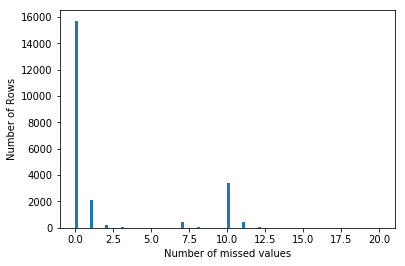

In [318]:
missed_data_per_row =df_lis.isnull().sum(axis=1)
plt.hist(missed_data_per_row, bins=100)
plt.ylabel('Number of Rows')
plt.xlabel('Number of missed values')
plt.show()

In [319]:
row_na = df_lis.shape[1] - df_lis.count(axis = 1)
rows_to_drop = df_lis.index[row_na > 9]
df_lis.drop(rows_to_drop, axis=0, inplace = True)

In [320]:
df_lis.dtypes.sort_values()

id                                    int64
calculated_host_listings_count        int64
accommodates                          int64
guests_included                       int64
minimum_nights                        int64
maximum_nights                        int64
availability_30                       int64
availability_90                       int64
availability_365                      int64
number_of_reviews                     int64
availability_60                       int64
scrape_id                             int64
host_id                               int64
review_scores_rating                float64
review_scores_accuracy              float64
longitude                           float64
review_scores_cleanliness           float64
review_scores_checkin               float64
review_scores_communication         float64
extra_people                        float64
review_scores_location              float64
price                               float64
beds                            

In [321]:
for col in df_lis.columns:
    if len(df_lis[col].unique().tolist()) > 2:
        print(col)

id
listing_url
name
summary
description
picture_url
host_id
host_url
host_name
host_since
host_location
host_thumbnail_url
host_picture_url
host_listings_count
host_total_listings_count
host_verifications
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
latitude
longitude
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
price
guests_included
extra_people
minimum_nights
maximum_nights
calendar_updated
availability_30
availability_60
availability_90
availability_365
number_of_reviews
first_review
last_review
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
cancellation_policy
calculated_host_listings_count
reviews_per_month


In [322]:
for col in df_lis.columns:
    if len(df_lis[col].unique().tolist()) < 2:
        print(col, df_lis[col].unique().tolist())

scrape_id [20181107122246]
experiences_offered ['none']
country_code ['DE']
country ['Germany']
has_availability ['t']
is_business_travel_ready ['f']


In [323]:
['space',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_neighbourhood',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'license',
 'jurisdiction_names']

['space',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_neighbourhood',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'license',
 'jurisdiction_names']

In [324]:
columns_2drop = ['scrape_id', 'last_scraped', 'experiences_offered', 'state', 'market', 
                 'country_code', 'country','calendar_last_scraped', 
                 'requires_license', 'first_review', 'last_review', 'availability_30',
                 'availability_60', 'availability_90', 'availability_365', 'city', 'zipcode', 'listing_url', 
                 'name', 'summary', 'description', 
                 'picture_url', 'host_id', 'host_url',
                 'host_name', 'host_since', 'host_location', 'host_thumbnail_url',
                 'host_picture_url', 'street', 'neighbourhood_cleansed', 
                 'neighbourhood_group_cleansed', 'smart_location', 'latitude', 'longitude', 'calendar_updated',
                 'neighbourhood', 'amenities']
df_lis_clean = df_lis.drop(columns_2drop, axis=1)

In [325]:
df_lis_clean.columns

Index(['id', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'is_business_travel_ready',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

In [326]:
df_lis_clean.head()

,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,t,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,f,Guesthouse,Entire home/apt,...,10.0,10.0,9.0,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,t,Apartment,Private room,...,10.0,10.0,10.0,f,f,flexible,f,f,1,1.42
2,3176,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,t,Apartment,Entire home/apt,...,9.0,10.0,9.0,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,t,Apartment,Private room,...,10.0,9.0,9.0,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,t,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,t,Apartment,Private room,...,10.0,10.0,9.0,f,f,moderate,f,f,1,1.75


In [327]:
def experiences_set(df):
    amenities = df['amenities'].unique()
    experinces = set()
    for item in amenities:
        items_list = item.strip('{}').replace("'", '').replace("\"", '').replace('(', '').replace(')', '')
        items_list = items_list.replace('/', '_').replace(' ', '_').split(',')
        for it in items_list:
            if (it != ''):
                experinces.add(it)
    for col in experinces:
        df[col] = 0
    return df, experinces

In [328]:
def assign_experience_values(df):
    amenities = df['amenities'].unique()
    for row in range(df.shape[0]):
        print('row {0} of {1}'.format(row, df.shape[0]))
        for item in amenities:
            items_list = item.strip('{}').replace("'", '').replace("\"", '').replace('(', '').replace(')', '')
            items_list = items_list.replace('/', '_').replace(' ', '_').split(',')
            for col in items_list:
                if (col != ''):
                    df.at[row, col] = 1
    return df

In [339]:
categorial = ['cancellation_policy', 'bed_type', 'room_type', 'property_type']

In [340]:
for col in categorial:
    print(col, df_lis_clean[col].unique().tolist())

cancellation_policy ['strict_14_with_grace_period', 'flexible', 'moderate', 'super_strict_30', 'super_strict_60']
bed_type ['Real Bed', 'Pull-out Sofa', 'Futon', 'Couch', 'Airbed']
room_type ['Entire home/apt', 'Private room', 'Shared room']
property_type ['Guesthouse', 'Apartment', 'Condominium', 'Loft', 'House', 'Serviced apartment', 'Townhouse', 'Boutique hotel', 'Bed and breakfast', 'Bungalow', 'Boat', 'Guest suite', 'Island', 'Hostel', 'Train', 'Other', 'Camper/RV', 'Houseboat', 'Cabin', 'Cottage', 'Tiny house', 'Chalet', 'Castle', 'Villa', 'Aparthotel', 'Hotel', 'Tipi', 'Resort', 'In-law', 'Cave', 'Barn', 'Casa particular (Cuba)']


In [342]:
def host_verifications_set(df):
    rows_to_drop = df[df['host_verifications'].isnull() == True].index.values.tolist()
    df = df.drop(rows_to_drop, axis=0)
    verifications = df['host_verifications'].unique().tolist()
    host_verfs = set()
    for items in verifications:
        items = list(map(str.strip, items.strip('][').replace("'", '').split(',')))
        for subitem in items:
            host_verfs.add('host_verification_' + subitem)
    for col in host_verfs:
        df[col] = 0
    return df

In [343]:
def assign_values(df):
    for row in range(df.shape[0]):
        print('row {0} of {1}'.format(row, df.shape[0]))
        verifications = df.iloc[row]['host_verifications']
        verifications = list(map(str.strip, verifications.strip('][').replace("'", '').split(',')))
        for item in verifications:
            value = 'host_verification_' + item
            df.at[row, value] = 1
    return df

In [344]:
df_lis_clean = host_verifications_set(df_lis_clean)

In [345]:
df_lis_clean.to_csv("berlin_intermediate.csv", header = True )

In [346]:
df_lis_clean = assign_values(df_lis_clean)
df_lis_clean = df_lis_clean.drop(['host_verifications'], axis = 1)
df_lis_clean.head()

row 0 of 18628
row 1 of 18628
row 2 of 18628
row 3 of 18628
row 4 of 18628
row 5 of 18628
row 6 of 18628
row 7 of 18628
row 8 of 18629
row 9 of 18629
row 10 of 18629
row 11 of 18629
row 12 of 18629
row 13 of 18629
row 14 of 18629
row 15 of 18629
row 16 of 18629
row 17 of 18629
row 18 of 18629
row 19 of 18629
row 20 of 18629
row 21 of 18629
row 22 of 18629
row 23 of 18629
row 24 of 18629
row 25 of 18629
row 26 of 18629
row 27 of 18629
row 28 of 18629
row 29 of 18629
row 30 of 18629
row 31 of 18629
row 32 of 18629
row 33 of 18629
row 34 of 18629
row 35 of 18629
row 36 of 18629
row 37 of 18629
row 38 of 18629
row 39 of 18629
row 40 of 18629
row 41 of 18629
row 42 of 18629
row 43 of 18629
row 44 of 18629
row 45 of 18630
row 46 of 18630
row 47 of 18630
row 48 of 18631
row 49 of 18631
row 50 of 18631
row 51 of 18631
row 52 of 18631
row 53 of 18631
row 54 of 18631
row 55 of 18631
row 56 of 18631
row 57 of 18631
row 58 of 18631
row 59 of 18631
row 60 of 18631
row 61 of 18631
row 62 of 18631
ro

row 635 of 18652
row 636 of 18652
row 637 of 18652
row 638 of 18653
row 639 of 18653
row 640 of 18653
row 641 of 18653
row 642 of 18653
row 643 of 18653
row 644 of 18653
row 645 of 18653
row 646 of 18653
row 647 of 18653
row 648 of 18653
row 649 of 18653
row 650 of 18653
row 651 of 18653
row 652 of 18653
row 653 of 18653
row 654 of 18653
row 655 of 18653
row 656 of 18653
row 657 of 18653
row 658 of 18653
row 659 of 18653
row 660 of 18653
row 661 of 18654
row 662 of 18655
row 663 of 18655
row 664 of 18655
row 665 of 18655
row 666 of 18655
row 667 of 18655
row 668 of 18655
row 669 of 18655
row 670 of 18655
row 671 of 18655
row 672 of 18655
row 673 of 18655
row 674 of 18655
row 675 of 18655
row 676 of 18655
row 677 of 18655
row 678 of 18655
row 679 of 18655
row 680 of 18655
row 681 of 18655
row 682 of 18655
row 683 of 18655
row 684 of 18655
row 685 of 18655
row 686 of 18655
row 687 of 18655
row 688 of 18655
row 689 of 18655
row 690 of 18655
row 691 of 18655
row 692 of 18655
row 693 of 186

row 1330 of 18684
row 1331 of 18684
row 1332 of 18684
row 1333 of 18684
row 1334 of 18684
row 1335 of 18684
row 1336 of 18684
row 1337 of 18684
row 1338 of 18684
row 1339 of 18685
row 1340 of 18686
row 1341 of 18686
row 1342 of 18686
row 1343 of 18686
row 1344 of 18686
row 1345 of 18686
row 1346 of 18686
row 1347 of 18686
row 1348 of 18686
row 1349 of 18686
row 1350 of 18686
row 1351 of 18686
row 1352 of 18686
row 1353 of 18686
row 1354 of 18686
row 1355 of 18686
row 1356 of 18686
row 1357 of 18687
row 1358 of 18687
row 1359 of 18687
row 1360 of 18687
row 1361 of 18687
row 1362 of 18687
row 1363 of 18687
row 1364 of 18687
row 1365 of 18688
row 1366 of 18688
row 1367 of 18688
row 1368 of 18688
row 1369 of 18689
row 1370 of 18690
row 1371 of 18690
row 1372 of 18690
row 1373 of 18690
row 1374 of 18690
row 1375 of 18690
row 1376 of 18690
row 1377 of 18690
row 1378 of 18690
row 1379 of 18690
row 1380 of 18690
row 1381 of 18690
row 1382 of 18691
row 1383 of 18691
row 1384 of 18691
row 1385 o

row 1968 of 18733
row 1969 of 18733
row 1970 of 18733
row 1971 of 18733
row 1972 of 18733
row 1973 of 18733
row 1974 of 18734
row 1975 of 18734
row 1976 of 18734
row 1977 of 18734
row 1978 of 18734
row 1979 of 18734
row 1980 of 18734
row 1981 of 18734
row 1982 of 18734
row 1983 of 18735
row 1984 of 18735
row 1985 of 18735
row 1986 of 18735
row 1987 of 18735
row 1988 of 18735
row 1989 of 18735
row 1990 of 18735
row 1991 of 18735
row 1992 of 18735
row 1993 of 18735
row 1994 of 18735
row 1995 of 18735
row 1996 of 18735
row 1997 of 18735
row 1998 of 18735
row 1999 of 18735
row 2000 of 18735
row 2001 of 18735
row 2002 of 18736
row 2003 of 18736
row 2004 of 18736
row 2005 of 18736
row 2006 of 18736
row 2007 of 18736
row 2008 of 18736
row 2009 of 18736
row 2010 of 18736
row 2011 of 18736
row 2012 of 18736
row 2013 of 18736
row 2014 of 18736
row 2015 of 18736
row 2016 of 18736
row 2017 of 18736
row 2018 of 18736
row 2019 of 18736
row 2020 of 18736
row 2021 of 18736
row 2022 of 18736
row 2023 o

row 2512 of 18787
row 2513 of 18787
row 2514 of 18787
row 2515 of 18787
row 2516 of 18788
row 2517 of 18788
row 2518 of 18788
row 2519 of 18788
row 2520 of 18788
row 2521 of 18789
row 2522 of 18789
row 2523 of 18789
row 2524 of 18789
row 2525 of 18789
row 2526 of 18789
row 2527 of 18789
row 2528 of 18789
row 2529 of 18789
row 2530 of 18789
row 2531 of 18789
row 2532 of 18789
row 2533 of 18789
row 2534 of 18789
row 2535 of 18789
row 2536 of 18789
row 2537 of 18789
row 2538 of 18789
row 2539 of 18789
row 2540 of 18789
row 2541 of 18789
row 2542 of 18789
row 2543 of 18789
row 2544 of 18789
row 2545 of 18790
row 2546 of 18790
row 2547 of 18790
row 2548 of 18790
row 2549 of 18790
row 2550 of 18790
row 2551 of 18790
row 2552 of 18790
row 2553 of 18790
row 2554 of 18791
row 2555 of 18791
row 2556 of 18792
row 2557 of 18793
row 2558 of 18793
row 2559 of 18793
row 2560 of 18793
row 2561 of 18793
row 2562 of 18793
row 2563 of 18793
row 2564 of 18793
row 2565 of 18793
row 2566 of 18793
row 2567 o

row 3027 of 18843
row 3028 of 18843
row 3029 of 18843
row 3030 of 18844
row 3031 of 18844
row 3032 of 18844
row 3033 of 18844
row 3034 of 18844
row 3035 of 18844
row 3036 of 18844
row 3037 of 18844
row 3038 of 18844
row 3039 of 18844
row 3040 of 18844
row 3041 of 18845
row 3042 of 18845
row 3043 of 18845
row 3044 of 18845
row 3045 of 18846
row 3046 of 18846
row 3047 of 18846
row 3048 of 18847
row 3049 of 18847
row 3050 of 18847
row 3051 of 18847
row 3052 of 18847
row 3053 of 18847
row 3054 of 18847
row 3055 of 18848
row 3056 of 18848
row 3057 of 18848
row 3058 of 18848
row 3059 of 18848
row 3060 of 18848
row 3061 of 18849
row 3062 of 18849
row 3063 of 18850
row 3064 of 18850
row 3065 of 18850
row 3066 of 18850
row 3067 of 18850
row 3068 of 18851
row 3069 of 18851
row 3070 of 18851
row 3071 of 18851
row 3072 of 18851
row 3073 of 18851
row 3074 of 18851
row 3075 of 18851
row 3076 of 18851
row 3077 of 18851
row 3078 of 18851
row 3079 of 18851
row 3080 of 18852
row 3081 of 18852
row 3082 o

row 3534 of 18964
row 3535 of 18964
row 3536 of 18965
row 3537 of 18966
row 3538 of 18966
row 3539 of 18966
row 3540 of 18966
row 3541 of 18966
row 3542 of 18966
row 3543 of 18966
row 3544 of 18966
row 3545 of 18966
row 3546 of 18967
row 3547 of 18967
row 3548 of 18967
row 3549 of 18967
row 3550 of 18967
row 3551 of 18967
row 3552 of 18967
row 3553 of 18967
row 3554 of 18967
row 3555 of 18967
row 3556 of 18967
row 3557 of 18968
row 3558 of 18969
row 3559 of 18969
row 3560 of 18969
row 3561 of 18969
row 3562 of 18969
row 3563 of 18969
row 3564 of 18969
row 3565 of 18969
row 3566 of 18969
row 3567 of 18970
row 3568 of 18970
row 3569 of 18970
row 3570 of 18970
row 3571 of 18970
row 3572 of 18970
row 3573 of 18970
row 3574 of 18970
row 3575 of 18970
row 3576 of 18970
row 3577 of 18970
row 3578 of 18970
row 3579 of 18971
row 3580 of 18972
row 3581 of 18973
row 3582 of 18973
row 3583 of 18973
row 3584 of 18973
row 3585 of 18974
row 3586 of 18974
row 3587 of 18975
row 3588 of 18975
row 3589 o

row 4124 of 19080
row 4125 of 19080
row 4126 of 19080
row 4127 of 19080
row 4128 of 19080
row 4129 of 19080
row 4130 of 19080
row 4131 of 19081
row 4132 of 19081
row 4133 of 19081
row 4134 of 19082
row 4135 of 19083
row 4136 of 19083
row 4137 of 19083
row 4138 of 19083
row 4139 of 19083
row 4140 of 19083
row 4141 of 19084
row 4142 of 19084
row 4143 of 19085
row 4144 of 19085
row 4145 of 19085
row 4146 of 19085
row 4147 of 19085
row 4148 of 19085
row 4149 of 19085
row 4150 of 19085
row 4151 of 19085
row 4152 of 19085
row 4153 of 19086
row 4154 of 19086
row 4155 of 19087
row 4156 of 19088
row 4157 of 19088
row 4158 of 19088
row 4159 of 19088
row 4160 of 19088
row 4161 of 19088
row 4162 of 19088
row 4163 of 19088
row 4164 of 19088
row 4165 of 19088
row 4166 of 19088
row 4167 of 19088
row 4168 of 19089
row 4169 of 19090
row 4170 of 19090
row 4171 of 19091
row 4172 of 19091
row 4173 of 19091
row 4174 of 19091
row 4175 of 19091
row 4176 of 19091
row 4177 of 19091
row 4178 of 19092
row 4179 o

row 4614 of 19166
row 4615 of 19166
row 4616 of 19166
row 4617 of 19167
row 4618 of 19167
row 4619 of 19167
row 4620 of 19167
row 4621 of 19167
row 4622 of 19167
row 4623 of 19167
row 4624 of 19167
row 4625 of 19168
row 4626 of 19168
row 4627 of 19168
row 4628 of 19168
row 4629 of 19168
row 4630 of 19169
row 4631 of 19170
row 4632 of 19170
row 4633 of 19171
row 4634 of 19172
row 4635 of 19172
row 4636 of 19172
row 4637 of 19173
row 4638 of 19173
row 4639 of 19174
row 4640 of 19174
row 4641 of 19174
row 4642 of 19174
row 4643 of 19174
row 4644 of 19175
row 4645 of 19175
row 4646 of 19175
row 4647 of 19175
row 4648 of 19175
row 4649 of 19175
row 4650 of 19175
row 4651 of 19175
row 4652 of 19176
row 4653 of 19176
row 4654 of 19176
row 4655 of 19176
row 4656 of 19176
row 4657 of 19176
row 4658 of 19176
row 4659 of 19176
row 4660 of 19176
row 4661 of 19176
row 4662 of 19176
row 4663 of 19176
row 4664 of 19177
row 4665 of 19177
row 4666 of 19177
row 4667 of 19177
row 4668 of 19177
row 4669 o

row 5119 of 19272
row 5120 of 19272
row 5121 of 19273
row 5122 of 19274
row 5123 of 19275
row 5124 of 19276
row 5125 of 19276
row 5126 of 19276
row 5127 of 19277
row 5128 of 19277
row 5129 of 19277
row 5130 of 19277
row 5131 of 19277
row 5132 of 19277
row 5133 of 19277
row 5134 of 19277
row 5135 of 19278
row 5136 of 19278
row 5137 of 19279
row 5138 of 19279
row 5139 of 19279
row 5140 of 19280
row 5141 of 19280
row 5142 of 19280
row 5143 of 19281
row 5144 of 19281
row 5145 of 19282
row 5146 of 19282
row 5147 of 19283
row 5148 of 19283
row 5149 of 19283
row 5150 of 19283
row 5151 of 19283
row 5152 of 19283
row 5153 of 19284
row 5154 of 19284
row 5155 of 19284
row 5156 of 19284
row 5157 of 19285
row 5158 of 19285
row 5159 of 19285
row 5160 of 19286
row 5161 of 19286
row 5162 of 19286
row 5163 of 19286
row 5164 of 19286
row 5165 of 19287
row 5166 of 19287
row 5167 of 19287
row 5168 of 19287
row 5169 of 19287
row 5170 of 19287
row 5171 of 19287
row 5172 of 19287
row 5173 of 19287
row 5174 o

row 5658 of 19383
row 5659 of 19383
row 5660 of 19383
row 5661 of 19384
row 5662 of 19385
row 5663 of 19385
row 5664 of 19386
row 5665 of 19386
row 5666 of 19386
row 5667 of 19386
row 5668 of 19386
row 5669 of 19386
row 5670 of 19386
row 5671 of 19386
row 5672 of 19386
row 5673 of 19386
row 5674 of 19386
row 5675 of 19386
row 5676 of 19386
row 5677 of 19386
row 5678 of 19387
row 5679 of 19388
row 5680 of 19388
row 5681 of 19388
row 5682 of 19388
row 5683 of 19388
row 5684 of 19388
row 5685 of 19388
row 5686 of 19389
row 5687 of 19389
row 5688 of 19389
row 5689 of 19389
row 5690 of 19389
row 5691 of 19389
row 5692 of 19389
row 5693 of 19389
row 5694 of 19389
row 5695 of 19390
row 5696 of 19390
row 5697 of 19390
row 5698 of 19391
row 5699 of 19391
row 5700 of 19392
row 5701 of 19392
row 5702 of 19392
row 5703 of 19392
row 5704 of 19392
row 5705 of 19392
row 5706 of 19393
row 5707 of 19394
row 5708 of 19394
row 5709 of 19394
row 5710 of 19394
row 5711 of 19394
row 5712 of 19394
row 5713 o

row 6212 of 19492
row 6213 of 19493
row 6214 of 19493
row 6215 of 19493
row 6216 of 19493
row 6217 of 19493
row 6218 of 19493
row 6219 of 19493
row 6220 of 19493
row 6221 of 19493
row 6222 of 19493
row 6223 of 19493
row 6224 of 19494
row 6225 of 19494
row 6226 of 19494
row 6227 of 19494
row 6228 of 19494
row 6229 of 19494
row 6230 of 19494
row 6231 of 19494
row 6232 of 19494
row 6233 of 19495
row 6234 of 19495
row 6235 of 19495
row 6236 of 19495
row 6237 of 19495
row 6238 of 19495
row 6239 of 19495
row 6240 of 19495
row 6241 of 19495
row 6242 of 19495
row 6243 of 19495
row 6244 of 19495
row 6245 of 19496
row 6246 of 19497
row 6247 of 19498
row 6248 of 19498
row 6249 of 19499
row 6250 of 19500
row 6251 of 19500
row 6252 of 19500
row 6253 of 19501
row 6254 of 19501
row 6255 of 19502
row 6256 of 19502
row 6257 of 19503
row 6258 of 19503
row 6259 of 19503
row 6260 of 19503
row 6261 of 19504
row 6262 of 19504
row 6263 of 19504
row 6264 of 19504
row 6265 of 19505
row 6266 of 19505
row 6267 o

row 6709 of 19605
row 6710 of 19606
row 6711 of 19607
row 6712 of 19607
row 6713 of 19608
row 6714 of 19608
row 6715 of 19609
row 6716 of 19609
row 6717 of 19610
row 6718 of 19610
row 6719 of 19610
row 6720 of 19610
row 6721 of 19610
row 6722 of 19610
row 6723 of 19610
row 6724 of 19610
row 6725 of 19610
row 6726 of 19611
row 6727 of 19611
row 6728 of 19612
row 6729 of 19613
row 6730 of 19613
row 6731 of 19614
row 6732 of 19614
row 6733 of 19614
row 6734 of 19614
row 6735 of 19614
row 6736 of 19614
row 6737 of 19614
row 6738 of 19614
row 6739 of 19614
row 6740 of 19614
row 6741 of 19614
row 6742 of 19614
row 6743 of 19614
row 6744 of 19614
row 6745 of 19614
row 6746 of 19615
row 6747 of 19615
row 6748 of 19615
row 6749 of 19615
row 6750 of 19615
row 6751 of 19616
row 6752 of 19616
row 6753 of 19616
row 6754 of 19616
row 6755 of 19617
row 6756 of 19617
row 6757 of 19617
row 6758 of 19617
row 6759 of 19617
row 6760 of 19617
row 6761 of 19617
row 6762 of 19617
row 6763 of 19617
row 6764 o

row 7231 of 19743
row 7232 of 19744
row 7233 of 19745
row 7234 of 19746
row 7235 of 19746
row 7236 of 19746
row 7237 of 19746
row 7238 of 19746
row 7239 of 19746
row 7240 of 19747
row 7241 of 19747
row 7242 of 19747
row 7243 of 19747
row 7244 of 19747
row 7245 of 19747
row 7246 of 19748
row 7247 of 19749
row 7248 of 19749
row 7249 of 19749
row 7250 of 19750
row 7251 of 19750
row 7252 of 19750
row 7253 of 19750
row 7254 of 19750
row 7255 of 19750
row 7256 of 19750
row 7257 of 19750
row 7258 of 19750
row 7259 of 19750
row 7260 of 19750
row 7261 of 19750
row 7262 of 19750
row 7263 of 19750
row 7264 of 19751
row 7265 of 19751
row 7266 of 19751
row 7267 of 19751
row 7268 of 19751
row 7269 of 19751
row 7270 of 19752
row 7271 of 19752
row 7272 of 19753
row 7273 of 19753
row 7274 of 19754
row 7275 of 19754
row 7276 of 19754
row 7277 of 19755
row 7278 of 19755
row 7279 of 19756
row 7280 of 19756
row 7281 of 19756
row 7282 of 19756
row 7283 of 19757
row 7284 of 19758
row 7285 of 19758
row 7286 o

row 7768 of 19876
row 7769 of 19876
row 7770 of 19877
row 7771 of 19878
row 7772 of 19878
row 7773 of 19878
row 7774 of 19878
row 7775 of 19879
row 7776 of 19879
row 7777 of 19879
row 7778 of 19879
row 7779 of 19880
row 7780 of 19880
row 7781 of 19880
row 7782 of 19880
row 7783 of 19880
row 7784 of 19880
row 7785 of 19881
row 7786 of 19881
row 7787 of 19881
row 7788 of 19881
row 7789 of 19881
row 7790 of 19881
row 7791 of 19881
row 7792 of 19881
row 7793 of 19882
row 7794 of 19883
row 7795 of 19883
row 7796 of 19884
row 7797 of 19884
row 7798 of 19884
row 7799 of 19884
row 7800 of 19885
row 7801 of 19885
row 7802 of 19885
row 7803 of 19886
row 7804 of 19886
row 7805 of 19887
row 7806 of 19887
row 7807 of 19887
row 7808 of 19887
row 7809 of 19888
row 7810 of 19888
row 7811 of 19888
row 7812 of 19888
row 7813 of 19888
row 7814 of 19888
row 7815 of 19888
row 7816 of 19888
row 7817 of 19888
row 7818 of 19888
row 7819 of 19888
row 7820 of 19888
row 7821 of 19889
row 7822 of 19889
row 7823 o

row 8247 of 19962
row 8248 of 19962
row 8249 of 19963
row 8250 of 19963
row 8251 of 19963
row 8252 of 19963
row 8253 of 19963
row 8254 of 19963
row 8255 of 19964
row 8256 of 19964
row 8257 of 19964
row 8258 of 19965
row 8259 of 19965
row 8260 of 19966
row 8261 of 19966
row 8262 of 19967
row 8263 of 19967
row 8264 of 19967
row 8265 of 19968
row 8266 of 19968
row 8267 of 19968
row 8268 of 19969
row 8269 of 19969
row 8270 of 19969
row 8271 of 19969
row 8272 of 19969
row 8273 of 19969
row 8274 of 19969
row 8275 of 19969
row 8276 of 19969
row 8277 of 19969
row 8278 of 19969
row 8279 of 19969
row 8280 of 19970
row 8281 of 19970
row 8282 of 19970
row 8283 of 19970
row 8284 of 19970
row 8285 of 19970
row 8286 of 19970
row 8287 of 19970
row 8288 of 19970
row 8289 of 19970
row 8290 of 19970
row 8291 of 19970
row 8292 of 19970
row 8293 of 19970
row 8294 of 19970
row 8295 of 19971
row 8296 of 19971
row 8297 of 19971
row 8298 of 19971
row 8299 of 19971
row 8300 of 19971
row 8301 of 19972
row 8302 o

row 8857 of 20036
row 8858 of 20036
row 8859 of 20036
row 8860 of 20036
row 8861 of 20036
row 8862 of 20036
row 8863 of 20036
row 8864 of 20036
row 8865 of 20036
row 8866 of 20036
row 8867 of 20036
row 8868 of 20036
row 8869 of 20036
row 8870 of 20036
row 8871 of 20036
row 8872 of 20036
row 8873 of 20037
row 8874 of 20037
row 8875 of 20037
row 8876 of 20037
row 8877 of 20037
row 8878 of 20037
row 8879 of 20037
row 8880 of 20037
row 8881 of 20037
row 8882 of 20038
row 8883 of 20038
row 8884 of 20039
row 8885 of 20039
row 8886 of 20039
row 8887 of 20039
row 8888 of 20039
row 8889 of 20039
row 8890 of 20039
row 8891 of 20040
row 8892 of 20040
row 8893 of 20040
row 8894 of 20040
row 8895 of 20040
row 8896 of 20040
row 8897 of 20040
row 8898 of 20040
row 8899 of 20041
row 8900 of 20041
row 8901 of 20041
row 8902 of 20041
row 8903 of 20041
row 8904 of 20041
row 8905 of 20041
row 8906 of 20041
row 8907 of 20041
row 8908 of 20041
row 8909 of 20042
row 8910 of 20042
row 8911 of 20042
row 8912 o

row 9405 of 20118
row 9406 of 20118
row 9407 of 20118
row 9408 of 20118
row 9409 of 20118
row 9410 of 20118
row 9411 of 20118
row 9412 of 20118
row 9413 of 20118
row 9414 of 20118
row 9415 of 20118
row 9416 of 20118
row 9417 of 20118
row 9418 of 20118
row 9419 of 20119
row 9420 of 20120
row 9421 of 20121
row 9422 of 20121
row 9423 of 20121
row 9424 of 20121
row 9425 of 20121
row 9426 of 20121
row 9427 of 20121
row 9428 of 20121
row 9429 of 20122
row 9430 of 20122
row 9431 of 20123
row 9432 of 20124
row 9433 of 20124
row 9434 of 20124
row 9435 of 20125
row 9436 of 20125
row 9437 of 20125
row 9438 of 20125
row 9439 of 20125
row 9440 of 20125
row 9441 of 20125
row 9442 of 20125
row 9443 of 20125
row 9444 of 20126
row 9445 of 20127
row 9446 of 20127
row 9447 of 20128
row 9448 of 20128
row 9449 of 20128
row 9450 of 20128
row 9451 of 20128
row 9452 of 20128
row 9453 of 20128
row 9454 of 20128
row 9455 of 20128
row 9456 of 20128
row 9457 of 20129
row 9458 of 20129
row 9459 of 20129
row 9460 o

row 9968 of 20181
row 9969 of 20181
row 9970 of 20181
row 9971 of 20181
row 9972 of 20181
row 9973 of 20181
row 9974 of 20181
row 9975 of 20181
row 9976 of 20181
row 9977 of 20181
row 9978 of 20181
row 9979 of 20181
row 9980 of 20182
row 9981 of 20182
row 9982 of 20182
row 9983 of 20182
row 9984 of 20182
row 9985 of 20182
row 9986 of 20182
row 9987 of 20182
row 9988 of 20182
row 9989 of 20182
row 9990 of 20182
row 9991 of 20182
row 9992 of 20182
row 9993 of 20182
row 9994 of 20182
row 9995 of 20182
row 9996 of 20182
row 9997 of 20183
row 9998 of 20183
row 9999 of 20183
row 10000 of 20183
row 10001 of 20183
row 10002 of 20183
row 10003 of 20184
row 10004 of 20185
row 10005 of 20185
row 10006 of 20185
row 10007 of 20185
row 10008 of 20185
row 10009 of 20186
row 10010 of 20186
row 10011 of 20186
row 10012 of 20186
row 10013 of 20187
row 10014 of 20187
row 10015 of 20187
row 10016 of 20187
row 10017 of 20187
row 10018 of 20187
row 10019 of 20187
row 10020 of 20188
row 10021 of 20188
row 10

row 10536 of 20238
row 10537 of 20238
row 10538 of 20239
row 10539 of 20239
row 10540 of 20239
row 10541 of 20239
row 10542 of 20239
row 10543 of 20239
row 10544 of 20239
row 10545 of 20239
row 10546 of 20239
row 10547 of 20239
row 10548 of 20239
row 10549 of 20239
row 10550 of 20239
row 10551 of 20239
row 10552 of 20239
row 10553 of 20239
row 10554 of 20239
row 10555 of 20239
row 10556 of 20239
row 10557 of 20239
row 10558 of 20239
row 10559 of 20239
row 10560 of 20239
row 10561 of 20239
row 10562 of 20239
row 10563 of 20240
row 10564 of 20240
row 10565 of 20240
row 10566 of 20240
row 10567 of 20240
row 10568 of 20240
row 10569 of 20240
row 10570 of 20241
row 10571 of 20241
row 10572 of 20241
row 10573 of 20241
row 10574 of 20241
row 10575 of 20241
row 10576 of 20241
row 10577 of 20241
row 10578 of 20241
row 10579 of 20241
row 10580 of 20241
row 10581 of 20241
row 10582 of 20241
row 10583 of 20242
row 10584 of 20242
row 10585 of 20242
row 10586 of 20242
row 10587 of 20242
row 10588 of

row 11043 of 20298
row 11044 of 20298
row 11045 of 20299
row 11046 of 20299
row 11047 of 20299
row 11048 of 20299
row 11049 of 20299
row 11050 of 20299
row 11051 of 20299
row 11052 of 20299
row 11053 of 20299
row 11054 of 20299
row 11055 of 20299
row 11056 of 20299
row 11057 of 20299
row 11058 of 20299
row 11059 of 20299
row 11060 of 20299
row 11061 of 20299
row 11062 of 20300
row 11063 of 20300
row 11064 of 20301
row 11065 of 20301
row 11066 of 20301
row 11067 of 20302
row 11068 of 20302
row 11069 of 20302
row 11070 of 20302
row 11071 of 20302
row 11072 of 20303
row 11073 of 20303
row 11074 of 20303
row 11075 of 20303
row 11076 of 20303
row 11077 of 20303
row 11078 of 20303
row 11079 of 20303
row 11080 of 20303
row 11081 of 20303
row 11082 of 20303
row 11083 of 20304
row 11084 of 20304
row 11085 of 20304
row 11086 of 20304
row 11087 of 20304
row 11088 of 20304
row 11089 of 20305
row 11090 of 20305
row 11091 of 20305
row 11092 of 20305
row 11093 of 20305
row 11094 of 20305
row 11095 of

row 11516 of 20359
row 11517 of 20359
row 11518 of 20359
row 11519 of 20359
row 11520 of 20359
row 11521 of 20359
row 11522 of 20360
row 11523 of 20360
row 11524 of 20361
row 11525 of 20361
row 11526 of 20361
row 11527 of 20361
row 11528 of 20361
row 11529 of 20361
row 11530 of 20361
row 11531 of 20361
row 11532 of 20361
row 11533 of 20361
row 11534 of 20362
row 11535 of 20362
row 11536 of 20362
row 11537 of 20363
row 11538 of 20364
row 11539 of 20364
row 11540 of 20364
row 11541 of 20365
row 11542 of 20365
row 11543 of 20366
row 11544 of 20366
row 11545 of 20366
row 11546 of 20366
row 11547 of 20366
row 11548 of 20366
row 11549 of 20366
row 11550 of 20366
row 11551 of 20366
row 11552 of 20366
row 11553 of 20366
row 11554 of 20366
row 11555 of 20366
row 11556 of 20366
row 11557 of 20366
row 11558 of 20367
row 11559 of 20367
row 11560 of 20367
row 11561 of 20367
row 11562 of 20367
row 11563 of 20368
row 11564 of 20368
row 11565 of 20368
row 11566 of 20368
row 11567 of 20368
row 11568 of

row 12135 of 20440
row 12136 of 20440
row 12137 of 20441
row 12138 of 20441
row 12139 of 20441
row 12140 of 20441
row 12141 of 20441
row 12142 of 20441
row 12143 of 20441
row 12144 of 20441
row 12145 of 20441
row 12146 of 20441
row 12147 of 20441
row 12148 of 20441
row 12149 of 20441
row 12150 of 20441
row 12151 of 20441
row 12152 of 20441
row 12153 of 20441
row 12154 of 20441
row 12155 of 20441
row 12156 of 20441
row 12157 of 20441
row 12158 of 20441
row 12159 of 20442
row 12160 of 20442
row 12161 of 20442
row 12162 of 20442
row 12163 of 20442
row 12164 of 20442
row 12165 of 20442
row 12166 of 20442
row 12167 of 20442
row 12168 of 20442
row 12169 of 20442
row 12170 of 20442
row 12171 of 20442
row 12172 of 20442
row 12173 of 20443
row 12174 of 20444
row 12175 of 20444
row 12176 of 20444
row 12177 of 20444
row 12178 of 20444
row 12179 of 20444
row 12180 of 20445
row 12181 of 20445
row 12182 of 20445
row 12183 of 20445
row 12184 of 20445
row 12185 of 20445
row 12186 of 20445
row 12187 of

row 12771 of 20516
row 12772 of 20516
row 12773 of 20516
row 12774 of 20516
row 12775 of 20516
row 12776 of 20516
row 12777 of 20516
row 12778 of 20516
row 12779 of 20516
row 12780 of 20516
row 12781 of 20516
row 12782 of 20517
row 12783 of 20517
row 12784 of 20517
row 12785 of 20517
row 12786 of 20517
row 12787 of 20517
row 12788 of 20517
row 12789 of 20517
row 12790 of 20518
row 12791 of 20518
row 12792 of 20518
row 12793 of 20518
row 12794 of 20518
row 12795 of 20519
row 12796 of 20519
row 12797 of 20519
row 12798 of 20519
row 12799 of 20519
row 12800 of 20519
row 12801 of 20519
row 12802 of 20519
row 12803 of 20519
row 12804 of 20519
row 12805 of 20519
row 12806 of 20519
row 12807 of 20519
row 12808 of 20519
row 12809 of 20519
row 12810 of 20519
row 12811 of 20519
row 12812 of 20519
row 12813 of 20520
row 12814 of 20520
row 12815 of 20520
row 12816 of 20520
row 12817 of 20520
row 12818 of 20520
row 12819 of 20520
row 12820 of 20520
row 12821 of 20520
row 12822 of 20521
row 12823 of

row 13210 of 20576
row 13211 of 20576
row 13212 of 20576
row 13213 of 20576
row 13214 of 20576
row 13215 of 20576
row 13216 of 20576
row 13217 of 20576
row 13218 of 20576
row 13219 of 20576
row 13220 of 20576
row 13221 of 20576
row 13222 of 20576
row 13223 of 20576
row 13224 of 20576
row 13225 of 20576
row 13226 of 20576
row 13227 of 20576
row 13228 of 20576
row 13229 of 20576
row 13230 of 20576
row 13231 of 20576
row 13232 of 20576
row 13233 of 20577
row 13234 of 20577
row 13235 of 20577
row 13236 of 20577
row 13237 of 20577
row 13238 of 20577
row 13239 of 20577
row 13240 of 20577
row 13241 of 20577
row 13242 of 20577
row 13243 of 20577
row 13244 of 20577
row 13245 of 20577
row 13246 of 20577
row 13247 of 20578
row 13248 of 20578
row 13249 of 20579
row 13250 of 20579
row 13251 of 20579
row 13252 of 20579
row 13253 of 20579
row 13254 of 20579
row 13255 of 20579
row 13256 of 20579
row 13257 of 20579
row 13258 of 20579
row 13259 of 20579
row 13260 of 20579
row 13261 of 20579
row 13262 of

row 13643 of 20635
row 13644 of 20635
row 13645 of 20635
row 13646 of 20635
row 13647 of 20635
row 13648 of 20635
row 13649 of 20635
row 13650 of 20636
row 13651 of 20637
row 13652 of 20637
row 13653 of 20638
row 13654 of 20638
row 13655 of 20639
row 13656 of 20639
row 13657 of 20639
row 13658 of 20640
row 13659 of 20641
row 13660 of 20641
row 13661 of 20642
row 13662 of 20642
row 13663 of 20642
row 13664 of 20642
row 13665 of 20642
row 13666 of 20642
row 13667 of 20642
row 13668 of 20642
row 13669 of 20642
row 13670 of 20642
row 13671 of 20642
row 13672 of 20642
row 13673 of 20642
row 13674 of 20642
row 13675 of 20642
row 13676 of 20643
row 13677 of 20643
row 13678 of 20643
row 13679 of 20643
row 13680 of 20643
row 13681 of 20643
row 13682 of 20643
row 13683 of 20643
row 13684 of 20643
row 13685 of 20643
row 13686 of 20643
row 13687 of 20643
row 13688 of 20643
row 13689 of 20643
row 13690 of 20643
row 13691 of 20643
row 13692 of 20643
row 13693 of 20643
row 13694 of 20644
row 13695 of

row 14100 of 20699
row 14101 of 20700
row 14102 of 20700
row 14103 of 20700
row 14104 of 20700
row 14105 of 20700
row 14106 of 20700
row 14107 of 20700
row 14108 of 20700
row 14109 of 20701
row 14110 of 20701
row 14111 of 20701
row 14112 of 20701
row 14113 of 20701
row 14114 of 20701
row 14115 of 20701
row 14116 of 20701
row 14117 of 20701
row 14118 of 20702
row 14119 of 20703
row 14120 of 20703
row 14121 of 20703
row 14122 of 20703
row 14123 of 20703
row 14124 of 20703
row 14125 of 20704
row 14126 of 20704
row 14127 of 20704
row 14128 of 20704
row 14129 of 20704
row 14130 of 20704
row 14131 of 20704
row 14132 of 20704
row 14133 of 20704
row 14134 of 20704
row 14135 of 20704
row 14136 of 20704
row 14137 of 20704
row 14138 of 20704
row 14139 of 20704
row 14140 of 20704
row 14141 of 20704
row 14142 of 20704
row 14143 of 20705
row 14144 of 20705
row 14145 of 20705
row 14146 of 20705
row 14147 of 20705
row 14148 of 20706
row 14149 of 20706
row 14150 of 20706
row 14151 of 20706
row 14152 of

row 14561 of 20773
row 14562 of 20773
row 14563 of 20773
row 14564 of 20774
row 14565 of 20775
row 14566 of 20775
row 14567 of 20776
row 14568 of 20776
row 14569 of 20776
row 14570 of 20776
row 14571 of 20776
row 14572 of 20776
row 14573 of 20776
row 14574 of 20776
row 14575 of 20776
row 14576 of 20776
row 14577 of 20777
row 14578 of 20777
row 14579 of 20777
row 14580 of 20778
row 14581 of 20778
row 14582 of 20778
row 14583 of 20779
row 14584 of 20779
row 14585 of 20779
row 14586 of 20779
row 14587 of 20779
row 14588 of 20779
row 14589 of 20779
row 14590 of 20779
row 14591 of 20779
row 14592 of 20779
row 14593 of 20779
row 14594 of 20779
row 14595 of 20779
row 14596 of 20779
row 14597 of 20779
row 14598 of 20779
row 14599 of 20779
row 14600 of 20779
row 14601 of 20779
row 14602 of 20779
row 14603 of 20780
row 14604 of 20780
row 14605 of 20780
row 14606 of 20781
row 14607 of 20781
row 14608 of 20781
row 14609 of 20781
row 14610 of 20781
row 14611 of 20781
row 14612 of 20782
row 14613 of

row 15034 of 20847
row 15035 of 20847
row 15036 of 20847
row 15037 of 20847
row 15038 of 20847
row 15039 of 20847
row 15040 of 20848
row 15041 of 20848
row 15042 of 20848
row 15043 of 20849
row 15044 of 20849
row 15045 of 20849
row 15046 of 20849
row 15047 of 20849
row 15048 of 20849
row 15049 of 20849
row 15050 of 20849
row 15051 of 20849
row 15052 of 20850
row 15053 of 20850
row 15054 of 20850
row 15055 of 20851
row 15056 of 20851
row 15057 of 20852
row 15058 of 20852
row 15059 of 20852
row 15060 of 20852
row 15061 of 20852
row 15062 of 20852
row 15063 of 20852
row 15064 of 20852
row 15065 of 20852
row 15066 of 20852
row 15067 of 20852
row 15068 of 20852
row 15069 of 20853
row 15070 of 20853
row 15071 of 20853
row 15072 of 20853
row 15073 of 20853
row 15074 of 20853
row 15075 of 20853
row 15076 of 20853
row 15077 of 20854
row 15078 of 20854
row 15079 of 20854
row 15080 of 20855
row 15081 of 20855
row 15082 of 20855
row 15083 of 20855
row 15084 of 20856
row 15085 of 20856
row 15086 of

row 15497 of 20917
row 15498 of 20918
row 15499 of 20918
row 15500 of 20918
row 15501 of 20919
row 15502 of 20919
row 15503 of 20919
row 15504 of 20919
row 15505 of 20920
row 15506 of 20920
row 15507 of 20920
row 15508 of 20920
row 15509 of 20920
row 15510 of 20920
row 15511 of 20921
row 15512 of 20921
row 15513 of 20921
row 15514 of 20921
row 15515 of 20921
row 15516 of 20921
row 15517 of 20921
row 15518 of 20921
row 15519 of 20921
row 15520 of 20921
row 15521 of 20921
row 15522 of 20921
row 15523 of 20921
row 15524 of 20921
row 15525 of 20921
row 15526 of 20922
row 15527 of 20922
row 15528 of 20922
row 15529 of 20922
row 15530 of 20922
row 15531 of 20922
row 15532 of 20922
row 15533 of 20923
row 15534 of 20923
row 15535 of 20924
row 15536 of 20924
row 15537 of 20924
row 15538 of 20924
row 15539 of 20924
row 15540 of 20924
row 15541 of 20924
row 15542 of 20924
row 15543 of 20924
row 15544 of 20924
row 15545 of 20924
row 15546 of 20924
row 15547 of 20924
row 15548 of 20924
row 15549 of

row 15938 of 21000
row 15939 of 21000
row 15940 of 21000
row 15941 of 21000
row 15942 of 21000
row 15943 of 21000
row 15944 of 21000
row 15945 of 21000
row 15946 of 21000
row 15947 of 21000
row 15948 of 21000
row 15949 of 21000
row 15950 of 21000
row 15951 of 21000
row 15952 of 21000
row 15953 of 21000
row 15954 of 21000
row 15955 of 21000
row 15956 of 21000
row 15957 of 21000
row 15958 of 21000
row 15959 of 21000
row 15960 of 21000
row 15961 of 21000
row 15962 of 21000
row 15963 of 21000
row 15964 of 21000
row 15965 of 21000
row 15966 of 21000
row 15967 of 21000
row 15968 of 21000
row 15969 of 21000
row 15970 of 21001
row 15971 of 21002
row 15972 of 21002
row 15973 of 21002
row 15974 of 21002
row 15975 of 21002
row 15976 of 21002
row 15977 of 21002
row 15978 of 21003
row 15979 of 21003
row 15980 of 21004
row 15981 of 21005
row 15982 of 21005
row 15983 of 21005
row 15984 of 21005
row 15985 of 21005
row 15986 of 21005
row 15987 of 21005
row 15988 of 21005
row 15989 of 21006
row 15990 of

row 16469 of 21111
row 16470 of 21112
row 16471 of 21112
row 16472 of 21112
row 16473 of 21112
row 16474 of 21112
row 16475 of 21112
row 16476 of 21112
row 16477 of 21113
row 16478 of 21113
row 16479 of 21114
row 16480 of 21114
row 16481 of 21114
row 16482 of 21114
row 16483 of 21114
row 16484 of 21115
row 16485 of 21115
row 16486 of 21115
row 16487 of 21115
row 16488 of 21115
row 16489 of 21115
row 16490 of 21115
row 16491 of 21116
row 16492 of 21117
row 16493 of 21117
row 16494 of 21117
row 16495 of 21117
row 16496 of 21118
row 16497 of 21119
row 16498 of 21119
row 16499 of 21119
row 16500 of 21119
row 16501 of 21119
row 16502 of 21119
row 16503 of 21119
row 16504 of 21119
row 16505 of 21119
row 16506 of 21119
row 16507 of 21119
row 16508 of 21119
row 16509 of 21119
row 16510 of 21119
row 16511 of 21119
row 16512 of 21119
row 16513 of 21119
row 16514 of 21119
row 16515 of 21119
row 16516 of 21119
row 16517 of 21119
row 16518 of 21120
row 16519 of 21121
row 16520 of 21121
row 16521 of

row 17024 of 21243
row 17025 of 21243
row 17026 of 21244
row 17027 of 21244
row 17028 of 21245
row 17029 of 21245
row 17030 of 21245
row 17031 of 21246
row 17032 of 21246
row 17033 of 21246
row 17034 of 21246
row 17035 of 21246
row 17036 of 21246
row 17037 of 21246
row 17038 of 21246
row 17039 of 21246
row 17040 of 21246
row 17041 of 21247
row 17042 of 21248
row 17043 of 21248
row 17044 of 21248
row 17045 of 21248
row 17046 of 21249
row 17047 of 21249
row 17048 of 21249
row 17049 of 21249
row 17050 of 21249
row 17051 of 21249
row 17052 of 21249
row 17053 of 21249
row 17054 of 21249
row 17055 of 21249
row 17056 of 21249
row 17057 of 21249
row 17058 of 21250
row 17059 of 21250
row 17060 of 21251
row 17061 of 21251
row 17062 of 21252
row 17063 of 21252
row 17064 of 21252
row 17065 of 21252
row 17066 of 21252
row 17067 of 21252
row 17068 of 21252
row 17069 of 21252
row 17070 of 21252
row 17071 of 21252
row 17072 of 21252
row 17073 of 21252
row 17074 of 21252
row 17075 of 21252
row 17076 of

row 17526 of 21326
row 17527 of 21326
row 17528 of 21327
row 17529 of 21327
row 17530 of 21327
row 17531 of 21327
row 17532 of 21327
row 17533 of 21327
row 17534 of 21328
row 17535 of 21328
row 17536 of 21328
row 17537 of 21328
row 17538 of 21328
row 17539 of 21328
row 17540 of 21329
row 17541 of 21329
row 17542 of 21329
row 17543 of 21329
row 17544 of 21329
row 17545 of 21329
row 17546 of 21329
row 17547 of 21329
row 17548 of 21329
row 17549 of 21329
row 17550 of 21330
row 17551 of 21330
row 17552 of 21330
row 17553 of 21330
row 17554 of 21330
row 17555 of 21330
row 17556 of 21330
row 17557 of 21330
row 17558 of 21330
row 17559 of 21330
row 17560 of 21330
row 17561 of 21330
row 17562 of 21330
row 17563 of 21330
row 17564 of 21331
row 17565 of 21331
row 17566 of 21332
row 17567 of 21332
row 17568 of 21332
row 17569 of 21332
row 17570 of 21332
row 17571 of 21333
row 17572 of 21333
row 17573 of 21333
row 17574 of 21333
row 17575 of 21333
row 17576 of 21333
row 17577 of 21333
row 17578 of

row 18044 of 21402
row 18045 of 21402
row 18046 of 21402
row 18047 of 21402
row 18048 of 21402
row 18049 of 21402
row 18050 of 21402
row 18051 of 21402
row 18052 of 21402
row 18053 of 21402
row 18054 of 21402
row 18055 of 21402
row 18056 of 21402
row 18057 of 21402
row 18058 of 21402
row 18059 of 21402
row 18060 of 21402
row 18061 of 21402
row 18062 of 21403
row 18063 of 21403
row 18064 of 21403
row 18065 of 21403
row 18066 of 21403
row 18067 of 21403
row 18068 of 21403
row 18069 of 21403
row 18070 of 21403
row 18071 of 21403
row 18072 of 21403
row 18073 of 21403
row 18074 of 21403
row 18075 of 21403
row 18076 of 21403
row 18077 of 21403
row 18078 of 21403
row 18079 of 21403
row 18080 of 21403
row 18081 of 21403
row 18082 of 21403
row 18083 of 21403
row 18084 of 21403
row 18085 of 21403
row 18086 of 21403
row 18087 of 21403
row 18088 of 21404
row 18089 of 21404
row 18090 of 21404
row 18091 of 21405
row 18092 of 21405
row 18093 of 21405
row 18094 of 21405
row 18095 of 21405
row 18096 of

row 18618 of 21478
row 18619 of 21478
row 18620 of 21478
row 18621 of 21478
row 18622 of 21478
row 18623 of 21478
row 18624 of 21478
row 18625 of 21478
row 18626 of 21478
row 18627 of 21479


,id,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,...,host_verification_selfie,host_verification_weibo,host_verification_offline_government_id,host_verification_kba,host_verification_sesame_offline,host_verification_facebook,host_verification_identity_manual,host_verification_jumio,host_verification_,host_verification_manual_online
0,2015.0,t,4.0,4.0,t,t,f,Guesthouse,Entire home/apt,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2695.0,f,1.0,1.0,t,t,t,Apartment,Private room,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3176.0,f,1.0,1.0,t,t,t,Apartment,Entire home/apt,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,3309.0,f,1.0,1.0,t,t,t,Apartment,Private room,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,7071.0,t,1.0,1.0,t,t,t,Apartment,Private room,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [347]:
df_lis_clean.to_csv("berlin_intermediate.csv", header = True )

In [348]:
df_lis_clean.iloc[0]

id                                                                2015
host_is_superhost                                                    t
host_listings_count                                                  4
host_total_listings_count                                            4
host_has_profile_pic                                                 t
host_identity_verified                                               t
is_location_exact                                                    f
property_type                                               Guesthouse
room_type                                              Entire home/apt
accommodates                                                         3
bathrooms                                                            1
bedrooms                                                             1
beds                                                                 2
bed_type                                                      Real Bed
price 

In [349]:
df_lis_clean['host_has_profile_pic'].replace(['t', 'f'], [1, 0], inplace=True)
df_lis_clean['host_identity_verified'].replace(['t', 'f'], [1, 0], inplace=True)
df_lis_clean['is_location_exact'].replace(['t', 'f'], [1, 0], inplace=True)
df_lis_clean['instant_bookable'].replace(['t', 'f'], [1, 0], inplace=True)
df_lis_clean['require_guest_profile_picture'].replace(['t', 'f'], [1, 0], inplace=True)
df_lis_clean['require_guest_phone_verification'].replace(['t', 'f'], [1, 0], inplace=True)
df_lis_clean['host_is_superhost'].replace(['t', 'f'], [1, 0], inplace=True)
df_lis_clean['has_availability'].replace(['t', 'f'], [1, 0], inplace=True)
df_lis_clean['is_business_travel_ready'].replace(['t', 'f'], [1, 0], inplace=True)
df_lis_clean.head()

,id,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,...,host_verification_selfie,host_verification_weibo,host_verification_offline_government_id,host_verification_kba,host_verification_sesame_offline,host_verification_facebook,host_verification_identity_manual,host_verification_jumio,host_verification_,host_verification_manual_online
0,2015.0,1.0,4.0,4.0,1.0,1.0,0.0,Guesthouse,Entire home/apt,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2695.0,0.0,1.0,1.0,1.0,1.0,1.0,Apartment,Private room,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3176.0,0.0,1.0,1.0,1.0,1.0,1.0,Apartment,Entire home/apt,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,3309.0,0.0,1.0,1.0,1.0,1.0,1.0,Apartment,Private room,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,7071.0,1.0,1.0,1.0,1.0,1.0,1.0,Apartment,Private room,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [350]:
for col in categorial:
    dummy = pd.get_dummies(df_lis_clean[col], prefix = col)
    df_lis_clean = pd.concat([df_lis_clean, dummy], axis = 1)

In [351]:
df_lis_clean.head()

,id,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,...,property_type_Island,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tiny house,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Villa
0,2015.0,1.0,4.0,4.0,1.0,1.0,0.0,Guesthouse,Entire home/apt,3.0,...,0,0,0,0,0,0,0,0,0,0
1,2695.0,0.0,1.0,1.0,1.0,1.0,1.0,Apartment,Private room,2.0,...,0,0,0,0,0,0,0,0,0,0
2,3176.0,0.0,1.0,1.0,1.0,1.0,1.0,Apartment,Entire home/apt,4.0,...,0,0,0,0,0,0,0,0,0,0
3,3309.0,0.0,1.0,1.0,1.0,1.0,1.0,Apartment,Private room,2.0,...,0,0,0,0,0,0,0,0,0,0
4,7071.0,1.0,1.0,1.0,1.0,1.0,1.0,Apartment,Private room,2.0,...,0,0,0,0,0,0,0,0,0,0


In [352]:
df_lis_clean = df_lis_clean.drop(categorial, axis = 1)
df_lis_clean.head()

,id,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,...,property_type_Island,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tiny house,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Villa
0,2015.0,1.0,4.0,4.0,1.0,1.0,0.0,3.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,2695.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,3176.0,0.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,3309.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,7071.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [353]:
df_lis_clean.isnull().sum()

id                                      2851
host_is_superhost                       2851
host_listings_count                     2851
host_total_listings_count               2851
host_has_profile_pic                    2851
host_identity_verified                  2851
is_location_exact                       2851
accommodates                            2851
bathrooms                               2876
bedrooms                                2861
beds                                    2871
price                                   2851
guests_included                         2851
extra_people                            2851
minimum_nights                          2851
maximum_nights                          2851
has_availability                        2851
number_of_reviews                       2851
review_scores_rating                    3329
review_scores_accuracy                  3354
review_scores_cleanliness               3351
review_scores_checkin                   3372
review_sco

In [354]:
df_lis_clean.dtypes

id                                      float64
host_is_superhost                       float64
host_listings_count                     float64
host_total_listings_count               float64
host_has_profile_pic                    float64
host_identity_verified                  float64
is_location_exact                       float64
accommodates                            float64
bathrooms                               float64
bedrooms                                float64
beds                                    float64
price                                   float64
guests_included                         float64
extra_people                            float64
minimum_nights                          float64
maximum_nights                          float64
has_availability                        float64
number_of_reviews                       float64
review_scores_rating                    float64
review_scores_accuracy                  float64
review_scores_cleanliness               

In [355]:
df_lis_clean.shape

(21479, 97)

In [356]:
df_lis_clean.drop('id', axis = 1, inplace = True)

In [357]:
df_lis_final = df_lis_clean

In [358]:
df_lis_final.shape

(21479, 96)

In [360]:
df_lis_final.head()

,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,...,property_type_Island,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tiny house,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Villa
0,1.0,4.0,4.0,1.0,1.0,0.0,3.0,1.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [361]:
imputer = Imputer()
df_lis_final = pd.DataFrame(imputer.fit_transform(df_lis_final), columns = df_lis_final.columns)

/Users/epifanov/anaconda3/envs/deep-learning/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [362]:
df_lis_final.isnull().sum()

host_is_superhost                       0
host_listings_count                     0
host_total_listings_count               0
host_has_profile_pic                    0
host_identity_verified                  0
is_location_exact                       0
accommodates                            0
bathrooms                               0
bedrooms                                0
beds                                    0
price                                   0
guests_included                         0
extra_people                            0
minimum_nights                          0
maximum_nights                          0
has_availability                        0
number_of_reviews                       0
review_scores_rating                    0
review_scores_accuracy                  0
review_scores_cleanliness               0
review_scores_checkin                   0
review_scores_communication             0
review_scores_location                  0
review_scores_value               

In [363]:
# scaler = StandardScaler()
# df_lis_final = pd.DataFrame(scaler.fit_transform(df_lis_final), columns = df_lis_final.columns)

In [364]:
df_lis_final.to_csv("berlin_final_imputed_scaled.csv", header = True )

In [365]:
df_lis_final.head()

,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,...,property_type_Island,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tiny house,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Villa
0,1.0,4.0,4.0,1.0,1.0,0.0,3.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modelling. Review Score Rating prediction

In [366]:
df_lis_final.columns

Index(['host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'is_location_exact',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'has_availability', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'is_business_travel_ready', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month', 'host_verification_zhima_selfie',
       'host_verification_email', 'host_verification_sesame',
       'host_verification_photographer', 'host_verification_sent_id',
       'host_verification_work_email', 'host_verification_government_id',
       'host_

In [472]:
# columns = df_lis_final.columns.tolist()
# columns.remove('review_scores_rating')
columns = ['accommodates', 'is_location_exact', 'bathrooms', 'bedrooms', 'beds', 'price', 
           'extra_people', 'minimum_nights', 'is_business_travel_ready',
           'cancellation_policy_flexible', 'cancellation_policy_moderate',
           'cancellation_policy_strict_14_with_grace_period', 
           'cancellation_policy_super_strict_30',
           'cancellation_policy_super_strict_60',  
           'number_of_reviews',
           'review_scores_accuracy', 'review_scores_cleanliness',
           'review_scores_checkin', 'review_scores_communication',
           'review_scores_location', 'review_scores_value', 'instant_bookable',
           'property_type_Aparthotel', 'property_type_Apartment',
           'property_type_Barn', 'property_type_Bed and breakfast',
           'property_type_Boat', 'property_type_Boutique hotel',
           'property_type_Bungalow', 'property_type_Cabin',
           'property_type_Camper/RV', 'property_type_Casa particular (Cuba)',
           'property_type_Castle', 'property_type_Cave', 'property_type_Chalet',
           'property_type_Condominium', 'property_type_Cottage',
           'property_type_Guest suite', 'property_type_Guesthouse',
           'property_type_Hostel', 'property_type_Hotel', 'property_type_House',
           'property_type_Houseboat', 'property_type_In-law',
           'property_type_Island', 'property_type_Loft', 'property_type_Other',
           'property_type_Resort', 'property_type_Serviced apartment',
           'property_type_Tiny house', 'property_type_Tipi',
           'property_type_Townhouse', 'property_type_Train',
           'property_type_Villa' ]
X = df_lis_final[columns].values.tolist()
Y = df_lis_final['review_scores_rating'].values.tolist()

In [473]:
def evaluate_model(model, Y_test, Y_pred, category_names):
    results = pd.DataFrame(columns = ['recall', 'f1_score'])
    idx = 0
    precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, Y_pred, average='weighted')
    results.at[idx, 'precision'] = precision
    results.at[idx, 'recall'] = recall
    results.at[idx, 'f1_score'] = f1_score

    print("Average precision", results.precision.mean())
    print("Average recall", results.recall.mean())
    print("Average f_score", results.f1_score.mean())
    pass

In [474]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
clf = LinearRegression()
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

## Evaluation

In [480]:
import sys
df_coeff = pd.DataFrame(columns=['Coefficient_Name', 'weight'])
df_coeff['Coefficient_Name'] = pd.Series(columns)
df_coeff['weight'] = pd.Series(clf.coef_)
df_coeff[['Coefficient_Name', 'weight']].sort_values(by='weight').to_csv(sys.stdout)

,Coefficient_Name,weight
50,property_type_Tipi,-5.259466089482977
47,property_type_Resort,-5.091697601398835
40,property_type_Hotel,-3.156723279575097
22,property_type_Aparthotel,-2.0131537362562573
52,property_type_Train,-1.9714916343334363
46,property_type_Other,-1.848875578329924
30,property_type_Camper/RV,-1.3980707106962729
32,property_type_Castle,-0.9584881512768133
53,property_type_Villa,-0.8413078322796423
43,property_type_In-law,-0.7689647309369017
10,cancellation_policy_moderate,-0.720912235625705
12,cancellation_policy_super_strict_30,-0.6658240358017242
11,cancellation_policy_strict_14_with_grace_period,-0.6598890208255488
9,cancellation_policy_flexible,-0.6367377045506576
49,property_type_Tiny house,-0.3938140524548448
39,property_type_Hostel,-0.28881341667458327
21,instant_bookable,-0.22240215759093768
4,beds,-0.19921958842059662
14,number_of_reviews,-0.008930579046740867
6,extra_people,-0.003933032987607572
7,minimum_nights,-0.00047850909419385433
31,property_type_Casa p

In [478]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred)

15.57112308573517

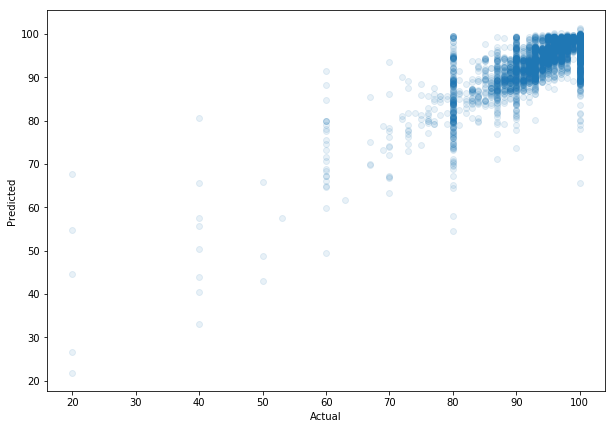

In [479]:
# Plot
plt.figure(figsize=(10,7))
plt.scatter(Y_test, Y_pred, alpha=0.1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## Question 1: what is the best time period to visit the city?

In [481]:
df_cal['date'] = pd.to_datetime(df_cal['date'])

In [482]:
df = df_cal.groupby(['date'], as_index=False).count()
df['Percentage'] = df['price']/df['listing_id'] * 100

In [483]:
ber_public_holidays = ['2019-01-01', '2019-03-25', '2019-03-27', '2019-03-28', 
                       '2019-05-01', '2019-05-05', '2019-05-16', '2019-10-03',
                       '2018-12-25', '2018-12-26']
ber_public_holidays_labels = ['New Year\'s Day', 'Good Friday', 'Easter', 'Easter Monday',
                              'Labour Day', 'Ascension Day', 'Whit Monday', 'German Unity Day',
                             'Christmas Day', '2nd Day of Christmas']
ber_public_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'red', 'orangered', 'crimson']

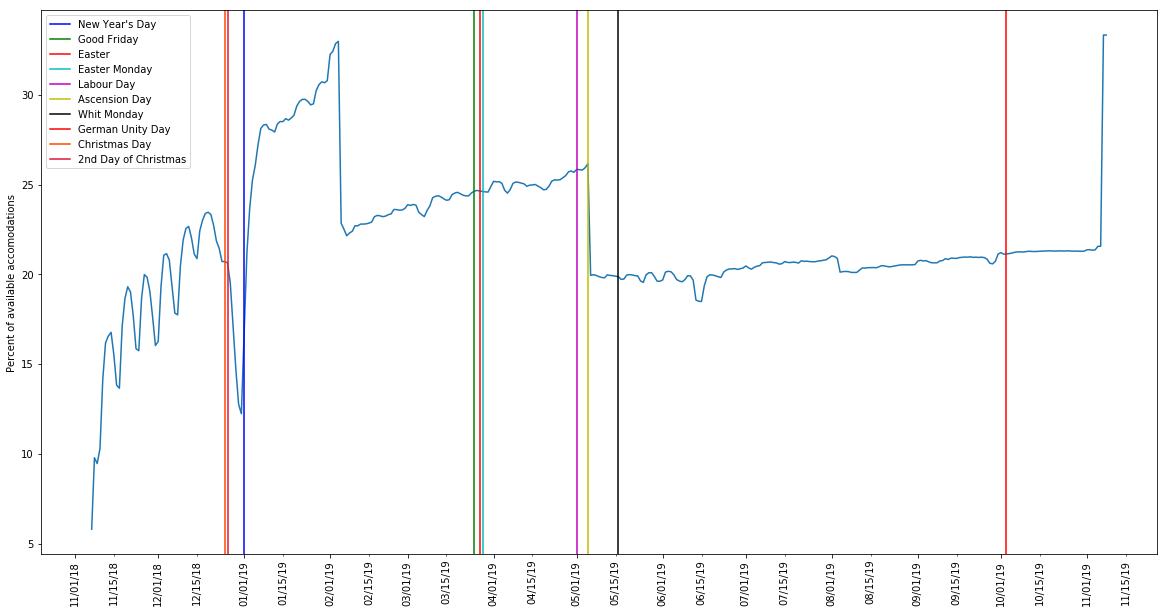

In [485]:
from matplotlib.dates import DateFormatter, MonthLocator
import datetime as dt

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df.date.astype(pd.datetime).values.tolist(), df.Percentage.values.tolist())

ax.xaxis.set_minor_locator(MonthLocator(bymonthday=15))
ax.xaxis.set_major_locator(MonthLocator(bymonthday=1))
ax.xaxis.set_minor_formatter(DateFormatter("%D"))
ax.xaxis.set_major_formatter(DateFormatter("%D"))
for label in ax.get_xminorticklabels():
    label.set_rotation(90)
for label in ax.get_xmajorticklabels():
    label.set_rotation(90)
    
for d, h, c in zip(ber_public_holidays, ber_public_holidays_labels, ber_public_colors):
    plt.axvline(x = dt.datetime.strptime(d, '%Y-%m-%d'), label=h, color=c)
plt.legend()
plt.ylabel('Percent of available accomodations')
plt.show()

## Data preparation to answer on Question 2

In [486]:
df_lis['id'] = df_lis['id'].astype('int')
df_lis = df_lis.sort_values(by='id')
df_lis = df_lis.reset_index(drop=True)
df_lis.head()

,id,listing_url,scrape_id,last_scraped,name,summary,description,experiences_offered,picture_url,host_id,...,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,Great location! 30 of 75 sq meters. This wood...,none,https://a0.muscache.com/im/pictures/260fd609-7...,2217,...,10.0,9.0,t,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,none,https://a0.muscache.com/im/pictures/97d4f6e8-1...,2986,...,10.0,10.0,t,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,This beautiful first floor apartment is situa...,none,https://a0.muscache.com/im/pictures/243355/84a...,3718,...,10.0,9.0,t,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,https://www.airbnb.com/rooms/3309,20181107122246,2018-11-07,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,First of all: I prefer short-notice bookings. ...,none,https://a0.muscache.com/im/pictures/29054294/b...,4108,...,9.0,9.0,t,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,https://www.airbnb.com/rooms/7071,20181107122246,2018-11-07,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,Cozy and large room in the beautiful district ...,none,https://a0.muscache.com/im/pictures/21278/32a1...,17391,...,10.0,9.0,t,f,f,moderate,f,f,1,1.75


In [489]:
def get_min_max_mean_price(df):
    s_df_clean_cal = pd.DataFrame(df.groupby(['listing_id'], as_index=False).mean())
    s_df_clean_cal['min_price'] =  df.groupby(['listing_id'], as_index=False).price.min()['price']
    s_df_clean_cal['max_price'] =  df.groupby(['listing_id'], as_index=False).price.max()['price']

    s_df_clean_cal = s_df_clean_cal.rename(columns={"listing_id": "id", "price": "mean_price"})
    s_df_clean_cal = s_df_clean_cal.sort_values(by='id')
    s_df_clean_cal = s_df_clean_cal.reset_index(drop=True)
    
    return s_df_clean_cal

In [490]:
df_clean_cal = get_min_max_mean_price(df_cal)

In [491]:
df_lis_complete = pd.concat([df_lis, df_clean_cal], axis=1, sort=False)
df_lis_complete.head()

,id,listing_url,scrape_id,last_scraped,name,summary,description,experiences_offered,picture_url,host_id,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,id,mean_price,min_price,max_price
0,2015.0,https://www.airbnb.com/rooms/2015,2.018111e+13,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,Great location! 30 of 75 sq meters. This wood...,none,https://a0.muscache.com/im/pictures/260fd609-7...,2217.0,...,f,strict_14_with_grace_period,f,f,4.0,3.76,2015,81.900709,76.0,188.0
1,2695.0,https://www.airbnb.com/rooms/2695,2.018111e+13,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,none,https://a0.muscache.com/im/pictures/97d4f6e8-1...,2986.0,...,f,flexible,f,f,1.0,1.42,2695,NaN,NaN,NaN
2,3176.0,https://www.airbnb.com/rooms/3176,2.018111e+13,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,This beautiful first floor apartment is situa...,none,https://a0.muscache.com/im/pictures/243355/84a...,3718.0,...,f,strict_14_with_grace_period,f,f,1.0,1.25,3176,90.000000,90.0,90.0
3,3309.0,https://www.airbnb.com/rooms/3309,2.018111e+13,2018-11-07,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,First of all: I prefer short-notice bookings. ...,none,https://a0.muscache.com/im/pictures/29054294/b...,4108.0,...,f,strict_14_with_grace_period,f,f,1.0,0.39,3309,27.131313,26.0,30.0
4,7071.0,https://www.airbnb.com/rooms/7071,2.018111e+13,2018-11-07,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,Cozy and large room in the beautiful district ...,none,https://a0.muscache.com/im/pictures/21278/32a1...,17391.0,...,f,moderate,f,f,1.0,1.75,7071,44.384615,44.0,45.0


In [492]:
expencieveAreadf = pd.DataFrame()
#s_df_lis_complete, columns=['latitude', 'longitude', 'price']
expencieveAreadf['latitude'] = df_lis_complete['latitude']
expencieveAreadf['longitude'] = df_lis_complete['longitude']
expencieveAreadf['mean_price'] = df_lis_complete['mean_price']
expencieveAreadf['reviews_per_month'] = df_lis_complete['reviews_per_month']

In [493]:
expencieveAreadf.describe()

,latitude,longitude,mean_price,reviews_per_month
count,18628.000000,18628.000000,11764.000000,18622.000000
mean,52.509919,13.406355,76.078612,1.136225
std,0.030539,0.057217,144.257604,1.507425
min,52.345803,13.103557,9.000000,0.010000
25%,52.489174,13.376403,38.000000,0.180000
50%,52.509202,13.416896,55.000000,0.540000
75%,52.532662,13.439088,85.000000,1.500000
max,52.641499,13.757642,8600.000000,36.670000


In [494]:
expencieveAreadf = expencieveAreadf.dropna()

In [495]:
expencieveAreadf = expencieveAreadf[expencieveAreadf['mean_price'] < 500.0]

In [496]:
expencieveAreadf = expencieveAreadf.reset_index()

## Question 2: What are the most popular districts in Berlin from AirBnb bookings?

In [497]:
def get_heatmap(data, data_max_val, _radius=14, _blur=26, _min_zoom=10, _max_zoom=16, _min_opacity = 0.1):
    heatmap = Heatmap(locations=data, 
                      max_val=data_max_val,
                      radius=_radius, 
                      blur=_blur, 
                      max_zoom=_max_zoom,
                      min_opacity = _min_opacity)
    return heatmap

In [499]:
# from ipyleaflet import Map, basemaps, Heatmap, basemap_to_tiles
# from ipywidgets import Layout

defaultLayout=Layout(width='860px', height='680px')
m = Map(center=(df_lis.latitude.mean(), df_lis.longitude.mean()), zoom=12, 
                basemap= basemaps.Esri.WorldTopoMap,
                layout=defaultLayout)

locations = [[expencieveAreadf.loc[i]['latitude'],
              expencieveAreadf.loc[i]['longitude'],
              expencieveAreadf.loc[i]['mean_price']] for i in range(expencieveAreadf.shape[0])]
max_price = expencieveAreadf['mean_price'].max()
heatmap_price = get_heatmap(locations, max_price)

m.add_layer(heatmap_price);

m

Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/tile/{z}/{y}…

In [501]:
# from ipyleaflet import Map, basemaps, Heatmap, basemap_to_tiles
# from ipywidgets import Layout

defaultLayout=Layout(width='860px', height='680px')
m = Map(center=(df_lis.latitude.mean(), df_lis.longitude.mean()), zoom=12, 
                basemap= basemaps.Esri.WorldTopoMap,
                layout=defaultLayout)

locations = [[expencieveAreadf.loc[i]['latitude'],
              expencieveAreadf.loc[i]['longitude'],
              expencieveAreadf.loc[i]['reviews_per_month']] for i in range(expencieveAreadf.shape[0])]
most_popular = expencieveAreadf['reviews_per_month'].max()
heatmap_popularity = get_heatmap(locations, most_popular)

m.add_layer(heatmap_popularity);

m

Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/tile/{z}/{y}…